# Знакомство с данными

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [21]:
# Загружите обучающую выборку (признаки и метки классов)
data = list([])
f = open("train.csv")
i = 0
for line in f:
    if i == 0:
        i = 1
        continue
    data.append(list(map(int, line.split(','))))
f.close()
data = np.array(data)
x_train = data[:, 1:]
y_train = data[:, 0]

# Нарисуем каждую цифру по одному разу.

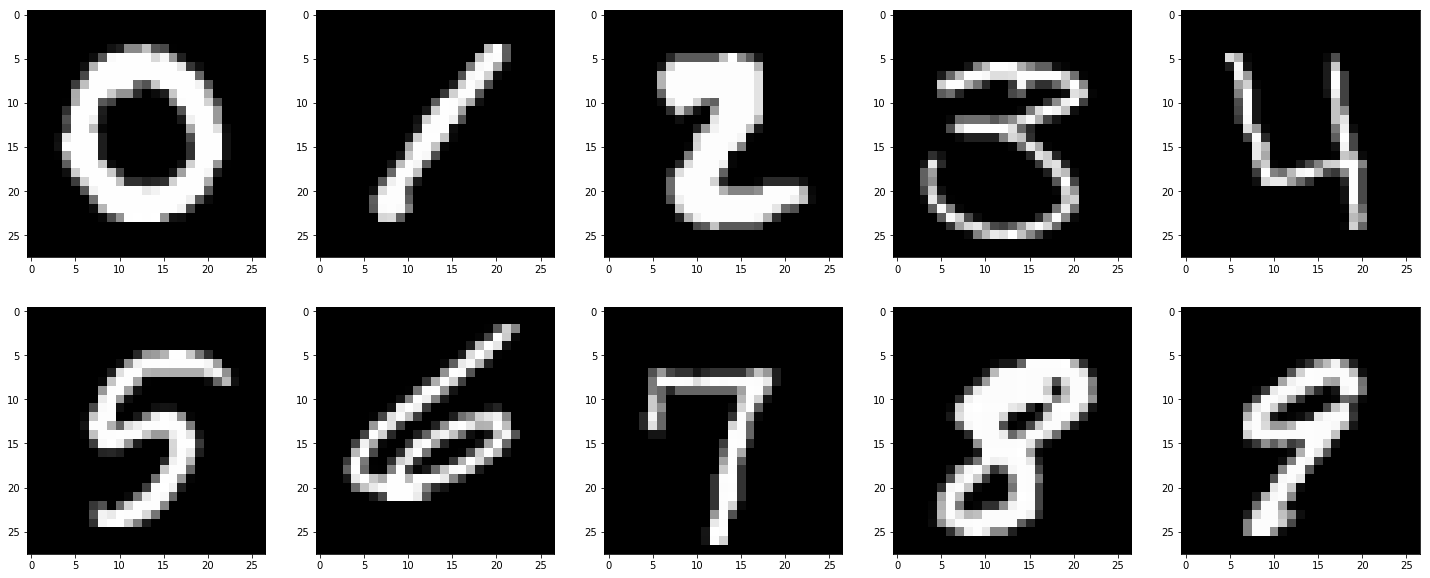

In [25]:
# нарисуйте по одной картинке каждой из 10 цифр (любые)
plt.figure(figsize=(25, 10))
for i in range(10):
    for k in range(len(x_train)):
        if y_train[k] == i:
            img = list([])
            j = 28
            while (j <= len(x_train[k])):
                img.append(x_train[k, j - 27: j])
                j += 28
            plt.subplot(2, 5, i + 1)
            plt.imshow(img, cmap='gray')
            break


In [ ]:
# опишите, сколько признаков в выборке, сколько объектов. Каких типов признкаки и объекты?

In [ ]:
# нарисуйте среднее изображение, нарисуйте среднее изображение для каждой из цифр
# Прокомментируйте

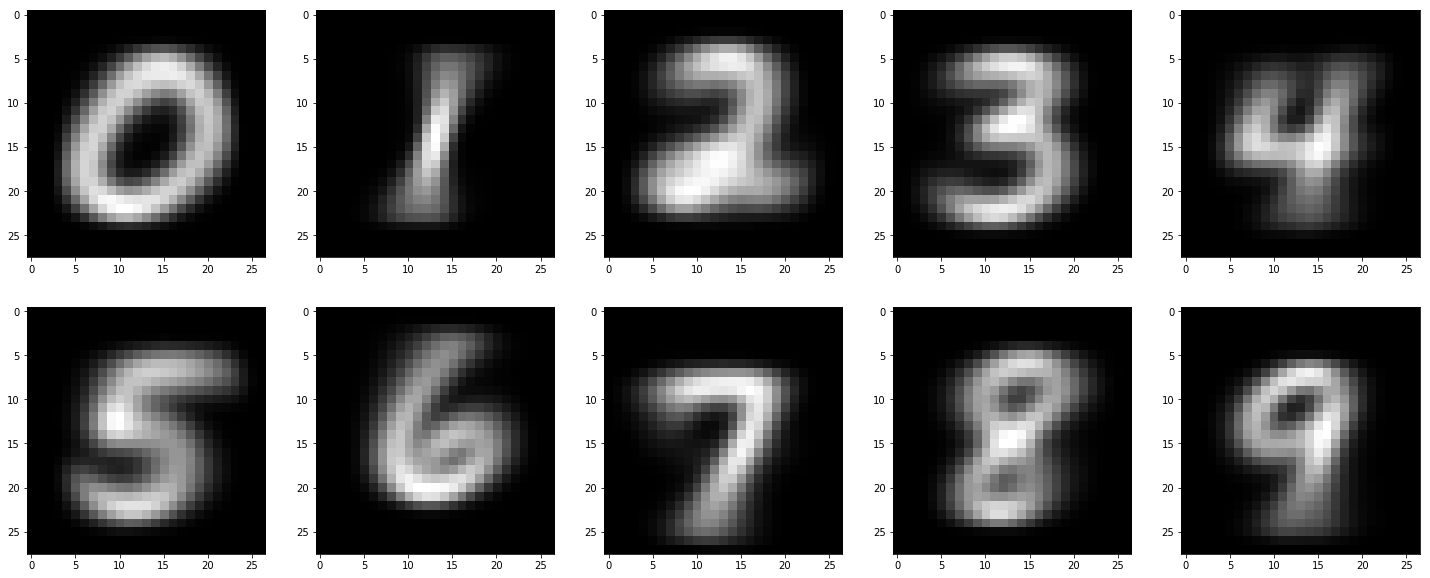

In [47]:
plt.figure(figsize=(25, 10))
for digit in range(10):
    average_img = np.array([0] * len(x_train[0]))
    k = 0
    for i in range(len(x_train)):
        if y_train[i] == digit:
            average_img += x_train[i]
            k += 1
    average_img //= k # непонятно, почему если убрать эту строчку, то ничего не изменится...
    img = list([])
    j = 28
    while (j <= len(x_train[0])):
        img.append(average_img[j - 27: j])
        j += 28
    plt.subplot(2, 5, digit + 1)
    plt.imshow(img, cmap='gray')

In [ ]:
# нарисуйте 3 самых близких с среднему изображинию и 3 самых далеких от среднего изображений
# Прокомментируйте

In [ ]:
# повторите предыдущий пункт для каждой из цифр
# Прокомментируйте

In [ ]:
# разбейте выборку на две псевдослучайные подвыборки повторяемым образом (70:30)

## Bad usage
print("-"*80)
print("\nBad usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    np.random.seed(0)
    print(np.random.normal())
    print(np.random.normal())
    print("Code after")
    print(np.random.normal())
    print(np.random.normal())

## Good usage
print("-"*80)
print("\nGood usage example\n")
for experiment_index in range(2):
    print("Experiment №", experiment_index)
    print("Our code")
    current_state = np.random.get_state()
    np.random.seed(0)
    print(np.random.normal(1))
    print(np.random.normal(1))
    np.random.set_state(current_state)
    print("Code after")
    print(np.random.normal())
    print(np.random.normal(1))

In [ ]:
# Какая еще информация о данных кажется Вам важной?